In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/baseball_academy/mlb_pbp_2021.csv")
#head, tail
df.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,466,SL,2021-10-12,88.3,-0.55,5.82,"Pressly, Ryan",514917.0,519151.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,1.0,2021.0,0.53,-0.22,-0.09,2.05,NaN,NaN,544725.0,2.0,9.0,Bot,163.78,...,5.0,95.5,-21.0,88.2,2776.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.41,0.11,0.104,0.0,1.0,0.0,0.0,2.0,84.0,2.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,94.0,0.0,-0.183
1,1,502,CU,2021-10-12,82.2,-0.57,5.89,"Pressly, Ryan",514917.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,0.0,2021.0,1.55,-1.22,-0.61,2.68,NaN,NaN,544725.0,2.0,9.0,Bot,NaN,...,3.0,79.9,-38.0,81.3,3368.0,6.0,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,1.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,30.0,0.0,-0.041
2,2,529,CU,2021-10-12,83.1,-0.45,5.84,"Pressly, Ryan",544725.0,519151.0,force_out,hit_into_play,NaN,NaN,NaN,NaN,6.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,2.0,2021.0,1.57,-0.94,0.30,2.28,NaN,NaN,650391.0,1.0,9.0,Bot,143.04,...,6.0,75.1,-20.0,82.4,3353.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.42,0.06,0.060,0.0,1.0,0.0,0.0,2.0,83.0,4.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,35.0,0.0,-0.238
3,3,561,SL,2021-10-12,91.0,-0.39,5.83,"Pressly, Ryan",544725.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,14.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,2.0,2021.0,0.59,-0.04,0.83,2.30,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,NaN,91.0,2779.0,6.2,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,3.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,118.0,0.0,0.000
4,4,578,CU,2021-10-12,83.6,-0.48,5.81,"Pressly, Ryan",544725.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,9.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,1.0,2021.0,1.28,-0.99,0.57,1.94,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,NaN,83.1,3274.0,6.2,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,2.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,35.0,0.0,-0.065


In [4]:
df.groupby('events')['release_speed'].agg('mean')

events
catcher_interf                91.311475
caught_stealing_2b            89.784459
caught_stealing_3b            91.837500
caught_stealing_home          89.025000
double                        88.781489
double_play                   89.090722
field_error                   88.492794
field_out                     88.862401
fielders_choice               88.905392
fielders_choice_out           89.070242
force_out                     88.633369
game_advisory                 91.300000
grounded_into_double_play     88.953281
hit_by_pitch                  88.192608
home_run                      88.928966
other_out                     85.833333
passed_ball                   82.100000
pickoff_1b                    90.650000
pickoff_2b                    92.033333
pickoff_3b                    95.350000
pickoff_caught_stealing_2b    92.750000
pickoff_caught_stealing_3b    95.600000
sac_bunt                      89.619560
sac_bunt_double_play          90.400000
sac_fly                       88.

In [5]:
df.groupby(['pitch_type','events'])['release_speed','release_spin_rate'].agg(['mean','max'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


release_speed       release_spin_rate        
                                          mean   max              mean     max
pitch_type events                                                             
CH         catcher_interf            86.840000  89.7       1764.200000  1939.0
           caught_stealing_2b        87.093750  92.1       1828.000000  2886.0
           caught_stealing_home      77.100000  77.1       1856.000000  1856.0
           double                    84.573810  94.5       1739.532158  2991.0
           double_play               85.225000  92.1       1685.607143  2271.0
...                                        ...   ...               ...     ...
SL         strikeout_double_play     85.251724  91.0       2448.448276  3088.0
           triple                    84.015179  93.0       2381.532110  2991.0
           triple_play               84.750000  85.0       2073.000000  2399.0
           walk                      85.013838  94.3       2426.869367  3388.0
           wild_pitch                87.000000  90.3       2683.000000  3059.0

[232 rows x 4 columns]

In [6]:
df[(df['player_name']=='Ryu, Hyun Jin') & (df['events']=='strikeout')]

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
9033,9033,349,FC,2021-10-03,88.2,2.21,5.75,"Ryu, Hyun Jin",642162.0,547943.0,strikeout,called_strike,NaN,NaN,NaN,NaN,14.0,Pat Valaika called out on strikes.,R,R,L,TOR,BAL,S,2.0,NaN,1.0,2.0,2021.0,0.24,0.97,0.88,2.20,NaN,NaN,NaN,0.0,5.0,Top,NaN,...,NaN,NaN,NaN,88.4,2100.0,6.2,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,572816.0,543807.0,606192.0,54.25,NaN,NaN,0.0,1.0,0.0,0.0,NaN,43.0,5.0,Cutter,11.0,1.0,1.0,11.0,1.0,11.0,1.0,11.0,Standard,Standard,139.0,0.001,-0.173
9064,9064,543,CH,2021-10-03,82.4,2.42,5.53,"Ryu, Hyun Jin",642721.0,547943.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Kelvin Gutierrez strikes out swinging.,R,R,L,TOR,BAL,S,2.0,NaN,1.0,2.0,2021.0,1.20,-0.18,0.61,1.37,NaN,641820.0,600474.0,1.0,4.0,Top,NaN,...,NaN,NaN,NaN,82.7,1501.0,6.6,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,572816.0,543807.0,606192.0,53.89,NaN,NaN,0.0,1.0,0.0,0.0,NaN,35.0,4.0,Changeup,9.0,1.0,1.0,9.0,1.0,9.0,1.0,9.0,Standard,Standard,97.0,0.007,-0.348
9077,9077,943,CH,2021-10-03,80.6,2.24,5.72,"Ryu, Hyun Jin",669720.0,547943.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Austin Hays strikes out swinging.,R,R,L,TOR,BAL,S,2.0,NaN,0.0,2.0,2021.0,1.05,0.56,1.53,1.57,NaN,NaN,NaN,0.0,4.0,Top,NaN,...,NaN,NaN,NaN,80.9,1540.0,6.5,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,572816.0,543807.0,606192.0,53.99,NaN,NaN,0.0,1.0,0.0,0.0,NaN,32.0,3.0,Changeup,9.0,1.0,1.0,9.0,1.0,9.0,1.0,9.0,Standard,Standard,112.0,0.003,-0.151
9144,9144,1708,FF,2021-10-03,92.7,2.03,5.84,"Ryu, Hyun Jin",600474.0,547943.0,strikeout,called_strike,NaN,NaN,NaN,NaN,7.0,Pedro Severino called out on strikes.,R,R,L,TOR,BAL,S,2.0,NaN,2.0,2.0,2021.0,1.27,1.08,-0.65,2.07,NaN,NaN,NaN,1.0,2.0,Top,NaN,...,NaN,NaN,NaN,92.4,2056.0,6.4,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,606192.0,543807.0,545341.0,54.12,NaN,NaN,0.0,1.0,0.0,0.0,NaN,13.0,5.0,4-Seam Fastball,3.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,Infield shift,Strategic,130.0,0.013,-0.142
9149,9149,2102,CU,2021-10-03,76.4,1.94,6.04,"Ryu, Hyun Jin",641820.0,547943.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,13.0,Trey Mancini strikes out swinging.,R,R,L,TOR,BAL,S,2.0,NaN,1.0,2.0,2021.0,-0.94,-1.17,-0.43,1.40,NaN,NaN,NaN,0.0,2.0,Top,NaN,...,NaN,NaN,NaN,76.0,2619.0,6.3,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,606192.0,543807.0,545341.0,54.22,NaN,NaN,0.0,1.0,0.0,0.0,NaN,12.0,6.0,Curveball,3.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,Standard,Strategic,322.0,0.020,-0.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711972,711972,496,FC,2021-04-01,85.0,2.32,5.70,"Ryu, Hyun Jin",650402.0,547943.0,strikeout,called_strike,NaN,NaN,NaN,NaN,12.0,Gleyber Torres called out on strikes.,R,R,L,NYY,TOR,S,2.0,NaN,1.0,2.0,2021.0,0.00,0.46,0.94,2.55,NaN,NaN,NaN

In [7]:
df2 = df[(df['pitcher']==669456) & (df['events']=='strikeout')]

In [8]:
df2.loc[df2['inning_topbot']=='Top','away_team']
#이닝 초 일때 원정 팀 == 공격팀

42738     CWS
42760     CWS
42781     CWS
435741    SEA
435747    SEA
435787    SEA
435796    SEA
435805    SEA
435872    SEA
435896    SEA
435900    SEA
479047    CWS
479060    CWS
479104    CWS
479110    CWS
479206    CWS
479217    CWS
479263    CWS
517546    MIN
517573    MIN
517599    MIN
517631    MIN
517700    MIN
561685    CHC
561696    CHC
561727    CHC
561736    CHC
561767    CHC
561832    CHC
561857    CHC
627012    NYY
627063    NYY
627067    NYY
627095    NYY
627101    NYY
627162    NYY
627165    NYY
627187    NYY
627192    NYY
690009     KC
690038     KC
690043     KC
690065     KC
690077     KC
690088     KC
690114     KC
690122     KC
690128     KC
690145     KC
690162     KC
690178     KC
Name: away_team, dtype: object

In [9]:
df2.loc[df2['inning_topbot']=='Top','Offense_Team'] =df2.loc[df2['inning_topbot']=='Top','away_team']
df2.loc[df2['inning_topbot']=='Bot','Defense_Team'] =df2.loc[df2['inning_topbot']=='Bot','home_team']

df2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Offense_Team,Defense_Team
20271,20271,15503,SL,2021-09-30,83.5,-1.32,5.66,"Bieber, Shane",670032.0,669456.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,9.0,Nicky Lopez strikes out swinging.,R,L,R,KC,CLE,S,2.0,NaN,2.0,2.0,2021.0,0.36,-0.13,0.62,1.44,NaN,NaN,NaN,1.0,1.0,Bot,NaN,...,NaN,84.4,2604.0,6.6,632284.0,669456.0,547379.0,656252.0,680911.0,608070.0,644374.0,640458.0,664702.0,605548.0,53.93,NaN,NaN,0.0,1.0,0.0,0.0,NaN,5.0,5.0,Slider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,24.0,-0.016,-0.142,NaN,KC
42738,42738,16617,FF,2021-09-24,91.8,-1.21,5.56,"Bieber, Shane",514917.0,669456.0,strikeout,called_strike,NaN,NaN,NaN,NaN,5.0,Cesar Hernandez called out on strikes.,R,L,R,CLE,CWS,S,2.0,NaN,1.0,2.0,2021.0,-0.60,1.48,-0.16,2.10,NaN,NaN,NaN,0.0,3.0,Top,NaN,...,NaN,92.6,2151.0,6.7,632363.0,669456.0,547379.0,656252.0,680911.0,608070.0,642708.0,623912.0,605548.0,640458.0,53.83,NaN,NaN,0.0,1.0,0.0,0.0,NaN,13.0,4.0,4-Seam Fastball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,216.0,0.025,-0.173,CWS,NaN
42760,42760,17005,SL,2021-09-24,83.3,-1.19,5.53,"Bieber, Shane",673357.0,669456.0,strikeout,called_strike,NaN,NaN,NaN,NaN,14.0,Luis Robert called out on strikes.,R,R,R,CLE,CWS,S,2.0,NaN,1.0,2.0,2021.0,0.04,0.14,0.80,1.51,NaN,NaN,NaN,1.0,2.0,Top,NaN,...,NaN,84.5,2426.0,6.7,632363.0,669456.0,547379.0,656252.0,680911.0,608070.0,642708.0,623912.0,605548.0,640458.0,53.79,NaN,NaN,0.0,1.0,0.0,0.0,NaN,8.0,4.0,Slider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,42.0,0.017,-0.114,CWS,NaN
42781,42781,17964,KC,2021-09-24,81.6,-1.07,5.59,"Bieber, Shane",660162.0,669456.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,9.0,Yoan Moncada strikes out swinging.,R,L,R,CLE,CWS,S,2.0,NaN,1.0,2.0,2021.0,0.63,-0.74,0.52,1.47,NaN,NaN,NaN,1.0,1.0,Top,NaN,...,NaN,82.1,2160.0,6.7,632363.0,669456.0,547379.0,656252.0,680911.0,608070.0,642708.0,623912.0,605548.0,640458.0,53.84,NaN,NaN,0.0,1.0,0.0,0.0,NaN,2.0,4.0,Knuckle Curve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infield shift,Standard,17.0,0.015,-0.114,CWS,NaN
435741,435741,19628,FF,2021-06-13,92.2,-1.34,5.47,"Bieber, Shane",608422.0,669456.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,2.0,Jose Godoy strikes out swinging.,R,L,R,CLE,SEA,S,2.0,NaN,3.0,2.0,2021.0,-0.63,1.64,0.09,2.91,NaN,NaN,NaN,1.0,6.0,Top,NaN,...,NaN,92.3,2276.0,6.6,633690.0,669456.0,595978.0,647304.0,514917.0,608070.0,642708.0,592696.0,605548.0,623912.0,53.86,NaN,NaN,0.0,1.0,0.0,0.0,NaN,44.0,6.0,4-Seam Fastball,0.0,5.0,5.0,0.0,5.0,0.0,5.0,0.0,Infield shift,Standard,216.0,0.003,-0.212,SEA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711708,711708,1216,KC,2021-04-01,82.4,-1.05,5.58,"Bieber, Shane",600869.0,669456.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,8.0,Jeimer Candelario strikes out swinging.,R,L,R,DET,CLE,S,2.0,NaN,2.0,2.0,2021.0,0.66,-1.15,-0.15,2.0

In [10]:
df[df.events=='home_run']

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
20,20,386,FF,2021-10-12,98.7,-1.46,5.97,"Hendriks, Liam",514888.0,521230.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Jose Altuve homers (1) on a fly ball to left f...,D,R,R,CWS,HOU,X,NaN,fly_ball,0.0,0.0,2021.0,-0.25,1.59,-0.12,2.49,NaN,663656.0,676801.0,2.0,9.0,Top,20.85,...,416.0,110.0,27.0,100.0,2583.0,7.0,660926.0,521230.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,641553.0,544725.0,53.48,0.990,2.020,2.0,1.0,0.0,3.0,6.0,78.0,1.0,4-Seam Fastball,1.0,7.0,7.0,1.0,10.0,1.0,10.0,1.0,Standard,Standard,197.0,-0.002,2.653
305,305,338,KC,2021-10-12,84.0,-1.66,5.24,"McCullers Jr., Lance",657757.0,621121.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,4.0,Gavin Sheets homers (1) on a fly ball to cente...,D,L,R,CWS,HOU,X,NaN,fly_ball,0.0,1.0,2021.0,1.46,-0.42,-0.48,2.34,NaN,NaN,NaN,1.0,2.0,Bot,128.89,...,408.0,106.2,23.0,83.1,2911.0,5.7,660926.0,621121.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676694.0,663656.0,54.79,0.900,1.587,2.0,1.0,0.0,3.0,6.0,15.0,2.0,Knuckle Curve,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Infield shift,Standard,52.0,0.113,1.027
368,368,841,FF,2021-10-12,94.0,1.99,5.60,"McGee, Jake",669257.0,459429.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Will Smith homers (2) on a fly ball to center ...,D,R,L,LAD,SF,X,NaN,fly_ball,0.0,0.0,2021.0,0.99,1.35,0.05,2.66,NaN,NaN,608369.0,1.0,8.0,Bot,104.07,...,396.0,109.5,23.0,93.2,2030.0,6.1,660918.0,459429.0,457763.0,573131.0,456781.0,446334.0,543063.0,592178.0,596103.0,573262.0,54.41,0.970,1.836,2.0,1.0,0.0,3.0,6.0,73.0,1.0,4-Seam Fastball,5.0,2.0,5.0,2.0,2.0,7.0,7.0,2.0,Standard,Standard,128.0,0.020,1.730
506,506,287,FF,2021-10-12,93.3,2.16,5.80,"García, Jarlín",605141.0,606424.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,6.0,Mookie Betts homers (1) on a fly ball to right...,D,R,L,LAD,SF,X,NaN,fly_ball,0.0,1.0,2021.0,1.19,0.94,0.76,2.28,NaN,NaN,621111.0,0.0,4.0,Bot,181.61,...,388.0,102.0,25.0,93.6,2156.0,6.4,660918.0,606424.0,457763.0,573131.0,600303.0,446334.0,543063.0,664774.0,573262.0,592178.0,54.07,0.723,1.258,2.0,1.0,0.0,3.0,6.0,34.0,2.0,4-Seam Fastball,2.0,0.0,2.0,0.0,0.0,4.0,4.0,0.0,Standard,Standard,126.0,0.103,1.637
650,650,664,SL,2021-10-12,83.6,3.43,5.15,"Hader, Josh",518692.0,623352.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Freddie Freeman homers (1) on a fly ball to ce...,D,L,L,ATL,MIL,X,NaN,fly_ball,0.0,0.0,2021.0,-0.66,0.00,-0.21,2.62,NaN,NaN,NaN,2.0,8.0,Bot,88.56,...,428.0,105.9,32.0,83.8,2464.0,6.6,660914.0,623352.0,571912.0,642133.0,543939.0,649966.0,642715.0,592885.0,456715.0,541645.0,53.86,0.903,1.860,2.0,1.0,0.0,3.0,6.0,73.0,1.0,Slider,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,Infield shift,Standard,318.0,0.324,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714604,714604,3354,SI,2021-04-01,89.6,4.18,3.37,"Hill, Tim",641796.0,657612.0,h

In [11]:
#isin()
df.events.isin(["home_run","double","triple"])
df[df.events.isin(['home_run','double','triple'])]

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
20,20,386,FF,2021-10-12,98.7,-1.46,5.97,"Hendriks, Liam",514888.0,521230.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Jose Altuve homers (1) on a fly ball to left f...,D,R,R,CWS,HOU,X,NaN,fly_ball,0.0,0.0,2021.0,-0.25,1.59,-0.12,2.49,NaN,663656.0,676801.0,2.0,9.0,Top,20.85,...,416.0,110.0,27.0,100.0,2583.0,7.0,660926.0,521230.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,641553.0,544725.0,53.48,0.990,2.020,2.00,1.0,0.0,3.0,6.0,78.0,1.0,4-Seam Fastball,1.0,7.0,7.0,1.0,10.0,1.0,10.0,1.0,Standard,Standard,197.0,-0.002,2.653
198,198,40,KC,2021-10-12,80.5,-1.73,5.18,"McCullers Jr., Lance",657757.0,621121.0,double,hit_into_play,NaN,NaN,NaN,NaN,8.0,Gavin Sheets doubles (1) on a sharp line drive...,D,L,R,CWS,HOU,X,9.0,line_drive,3.0,1.0,2021.0,1.20,-0.63,-0.09,2.09,NaN,NaN,NaN,2.0,4.0,Bot,220.66,...,325.0,100.4,21.0,79.6,2718.0,5.8,660926.0,621121.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.73,0.413,0.559,1.25,1.0,1.0,1.0,5.0,38.0,5.0,Knuckle Curve,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Infield shift,Standard,58.0,0.016,0.160
217,217,685,FF,2021-10-12,94.7,1.53,6.48,"Crochet, Garrett",608324.0,676979.0,double,hit_into_play,NaN,NaN,NaN,NaN,3.0,Alex Bregman doubles (1) on a sharp line drive...,D,R,L,CWS,HOU,X,8.0,line_drive,3.0,0.0,2021.0,0.33,1.33,0.57,3.14,NaN,455117.0,514888.0,2.0,4.0,Top,89.63,...,324.0,103.1,16.0,96.6,2214.0,7.2,660926.0,676979.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,673357.0,544725.0,53.27,0.620,0.701,1.25,1.0,1.0,1.0,5.0,34.0,4.0,4-Seam Fastball,1.0,3.0,3.0,1.0,5.0,1.0,5.0,1.0,Standard,Standard,161.0,-0.147,1.330
259,259,65,FF,2021-10-12,97.0,1.73,6.80,"Rodón, Carlos",621043.0,607074.0,double,hit_into_play,NaN,NaN,NaN,NaN,2.0,Carlos Correa doubles (2) on a line drive to l...,D,R,L,CWS,HOU,X,7.0,line_drive,0.0,2.0,2021.0,0.76,1.52,0.01,3.65,514888.0,608324.0,670541.0,2.0,3.0,Top,54.85,...,281.0,99.0,15.0,96.7,2419.0,6.0,660926.0,607074.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,673357.0,544725.0,54.49,0.707,0.705,1.25,1.0,1.0,1.0,4.0,24.0,3.0,4-Seam Fastball,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,Standard,Standard,156.0,-0.213,2.584
305,305,338,KC,2021-10-12,84.0,-1.66,5.24,"McCullers Jr., Lance",657757.0,621121.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,4.0,Gavin Sheets homers (1) on a fly ball to cente...,D,L,R,CWS,HOU,X,NaN,fly_ball,0.0,1.0,2021.0,1.46,-0.42,-0.48,2.34,NaN,NaN,NaN,1.0,2.0,Bot,128.89,...,408.0,106.2,23.0,83.1,2911.0,5.7,660926.0,621121.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676694.0,663656.0,54.79,0.900,1.587,2.00,1.0,0.0,3.0,6.0,15.0,2.0,Knuckle Curve,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Infield shift,Standard,52.0,0.113,1.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714848,714848,3424,FF,2021-04-01,95.5,-

In [12]:
import numpy as np
# ____.assign(새변수명 = np.where ( 조건  ,조건이 O일 때 값, 조건이 X일 때 값))

In [13]:
df = df.assign(hit=np.where(df.events=='home_run',1,0))
df.hit

0         0
1         0
2         0
3         0
4         0
         ..
715110    0
715111    0
715112    0
715113    0
715114    0
Name: hit, Length: 715115, dtype: int64

In [14]:
#안타(단타,~홈런)일 때 1로 만드는 hit column을 다시 만드시오.
df = df.assign(hit=np.where(df.events.isin(['home_run','triple','double','single']), 1, 0))
df.head(20)

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,hit
0,0,466,SL,2021-10-12,88.3,-0.55,5.82,"Pressly, Ryan",514917.0,519151.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,1.0,2021.0,0.53,-0.22,-0.09,2.05,NaN,NaN,544725.0,2.0,9.0,Bot,163.78,...,95.5,-21.0,88.2,2776.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.41,0.110,0.104,0.0,1.0,0.0,0.0,2.0,84.0,2.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,94.0,0.000,-0.183,0
1,1,502,CU,2021-10-12,82.2,-0.57,5.89,"Pressly, Ryan",514917.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,0.0,2021.0,1.55,-1.22,-0.61,2.68,NaN,NaN,544725.0,2.0,9.0,Bot,NaN,...,79.9,-38.0,81.3,3368.0,6.0,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,1.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,30.0,0.000,-0.041,0
2,2,529,CU,2021-10-12,83.1,-0.45,5.84,"Pressly, Ryan",544725.0,519151.0,force_out,hit_into_play,NaN,NaN,NaN,NaN,6.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,2.0,2021.0,1.57,-0.94,0.30,2.28,NaN,NaN,650391.0,1.0,9.0,Bot,143.04,...,75.1,-20.0,82.4,3353.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.42,0.060,0.060,0.0,1.0,0.0,0.0,2.0,83.0,4.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,35.0,0.000,-0.238,0
3,3,561,SL,2021-10-12,91.0,-0.39,5.83,"Pressly, Ryan",544725.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,14.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,2.0,2021.0,0.59,-0.04,0.83,2.30,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,91.0,2779.0,6.2,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,3.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,118.0,0.000,0.000,0
4,4,578,CU,2021-10-12,83.6,-0.48,5.81,"Pressly, Ryan",544725.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,9.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,1.0,2021.0,1.28,-0.99,0.57,1.94,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,83.1,3274.0,6.2,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,2.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,35.0,0.000,-0.065,0
5,5,614,CU,2021-10-12,81.9,-0.58,5.81,"Pressly, Ryan",544725.0,519151.0,NaN,called_strike,NaN,NaN,NaN,NaN,5.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,0.0,2021.0,1.54,-0.94,0.14,2.42,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,81.2,3325.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,33.0,0.000,-0.047,0
6,

In [15]:
df.events.head(20)

0     field_out
1           NaN
2     force_out
3           NaN
4           NaN
5           NaN
6     strikeout
7           NaN
8           NaN
9           NaN
10       single
11          NaN
12          NaN
13          NaN
14    strikeout
15          NaN
16          NaN
17          NaN
18       single
19          NaN
Name: events, dtype: object

In [16]:
df = df.assign(Offense = np.where(df.inning_topbot=="Top", df.away_team, df.home_team))
df.Offense.head(20)

0     CWS
1     CWS
2     CWS
3     CWS
4     CWS
5     CWS
6     CWS
7     CWS
8     CWS
9     CWS
10    CWS
11    CWS
12    CWS
13    CWS
14    HOU
15    HOU
16    HOU
17    HOU
18    HOU
19    HOU
Name: Offense, dtype: object

In [17]:
#과제5
df = df.assign(Offense_Team = np.where(df.inning_topbot == 'Top', df.away_team , df.home_team))
df = df.assign(Defense_Team = np.where(df.inning_topbot == 'Bot', df.away_team , df.home_team))


df5=df[df['description']!='foul']

df5['launch_speed'] = df5['launch_speed']*1.609

df5=df.groupby(['Offense_Team'])['launch_speed','launch_angle'].mean()
df5=df.groupby(['Defense_Team'])['launch_speed','launch_angle'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


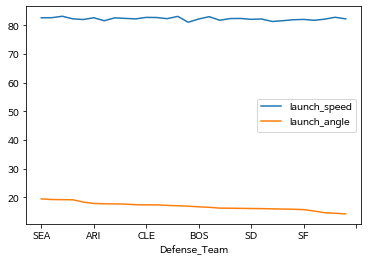

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
df5.plot()

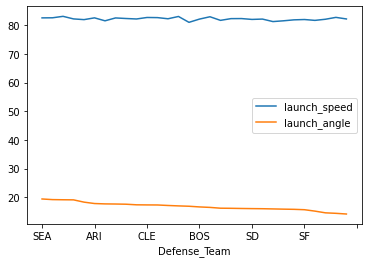

In [19]:
#오름차순으로 변수를 변형해서 plot 그리기
df5 = df5.sort_values('launch_angle',ascending=False)
df5.plot()

Text(0, 0.5, '타구 속도 / 발사 각도')

<Figure size 300x300 with 0 Axes>

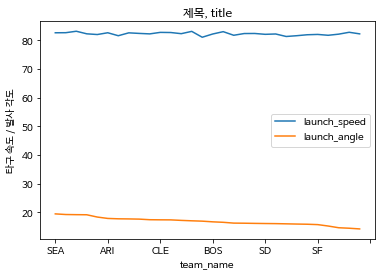

In [23]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(dpi=100, figsize=(3,3))
plt.rcParams['axes.unicode_minus'] = False


df5.plot()
plt.title('제목, title')
plt.xlabel('team_name')
plt.ylabel('타구 속도 / 발사 각도')

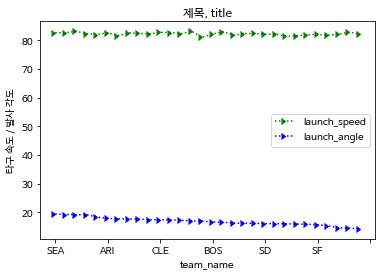

In [30]:
df5.plot(color=['green','blue'], linestyle=":", marker=5)
plt.title('제목, title')
plt.xlabel('team_name')
plt.ylabel('타구 속도 / 발사 각도')
plt.show()

Text(0, 0.5, '상하')

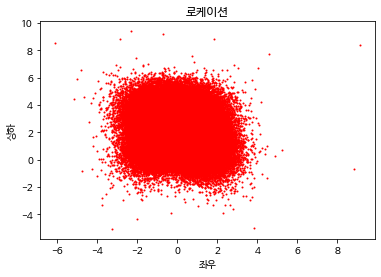

In [47]:
plt.scatter( df['plate_x'], df['plate_z'], color='red', s=1)
plt.title("로케이션")
plt.xlabel("좌우")
plt.ylabel("상하")

In [50]:
df2.description

20271     swinging_strike
42738       called_strike
42760       called_strike
42781     swinging_strike
435741    swinging_strike
               ...       
711708    swinging_strike
711720    swinging_strike
711723    swinging_strike
711740    swinging_strike
711749    swinging_strike
Name: description, Length: 132, dtype: object

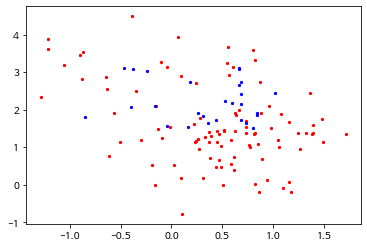

In [60]:
SS = df2.loc[(df2.description=="swinging_strike")|(df2.description=="swinging_strike_blocked")]
NS = df2.loc[df2.description=="called_strike"]

plt.scatter(SS['plate_x'], SS['plate_z'], s=5, color="red", label='헛스윙')
plt.scatter(NS['plate_x'], NS['plate_z'], s=5, color="blue", label='콜 스트라이크')

ax = plt.gca()
plt.show()